# HOW GEOGRAPHY, FERTILIZER AFFECT TO INDIAN CROPS

In [123]:
# Creating dependencies for setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
import warnings
from pathlib import Path
import hvplot.pandas
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

In [3]:
#Set file path
crop_csv=Path("resources/crop_yield.csv")
crop_csv

#Gather data from csv file
crop_df=pd.read_csv(crop_csv)

#CLean data
crop_cleaned_df=crop_df[["Crop","Crop_Year","State","Fertilizer","Pesticide","Yield"]]

,Crop,Crop_Year,State,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Assam,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Assam,631643.29,2057.47,0.710435
2,Castor seed,1997,Assam,75755.32,246.76,0.238333
3,Coconut,1997,Assam,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Assam,165500.63,539.09,0.420909
...,...,...,...,...,...,...
19684,Small millets,1998,Nagaland,395200.00,1160.00,0.500000
19685,Wheat,1998,Nagaland,98800.00,290.00,3.000000
19686,Maize,1997,Jammu and Kashmir,29586735.11,96373.73,1.285000
19687,Rice,1997,Jammu and Kashmir,26242746.82,85481.26,0.016667


In [16]:
crop_cleaned_df["Crop_Year"].value_counts()

2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: Crop_Year, dtype: int64

## GEOGRAPHY

In [17]:
# Function for ploting scatter plot
def plotting_scatter_plot(x,y,
                          x_label,y_label,title,
                         edgecolors='black',c="b"):
    # Build scatter plot
    plt.scatter(x,y,edgecolors=edgecolors,c=c)
    # Incorporate the other graph properties
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# Define a function for ploting Linear Regression Plot
def linear_reg_plot(x_values,y_values,anotation_percentage_x=0.4,anotation_percentage_y=0.1,
                    line_color="r-",anotation_color="red",anotation_fontsize=15):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-value is: {rvalue} \nThe r-squared value is: {rvalue**2}")
        
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,line_color)
    
    # Calculate best-fit coordinates
    
    # Adjust the position of anotation x-coordinate
    best_fit_x = max(x_values) - anotation_percentage_x * (max(x_values) - min(x_values))
    # Adjust the position of anotation y-coordinate
    best_fit_y = max(y_values) - anotation_percentage_y * (max(y_values) - min(y_values))  
    
    plt.annotate(line_eq,(best_fit_x,best_fit_y),fontsize=anotation_fontsize,color=anotation_color)

#The above functions was copied from DUc Trieu's previous assigment (Py weather)

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
states_name=crop_cleaned_df["State"].unique()
error_found=[]
state_data = []

# Print to logger
print("Starting to locate...")
print("-----------------------------")

appid=weather_api_key
#Loop through all state to retrieve data
for state in states_name:
    print("Getting the longitude and latitude of %s." % (state))
    params={"q": state,
           "appid":appid}
    try:
        response=requests.get(url,params=params).json()
        state_lat=response["coord"]["lat"]
        state_lon=response["coord"]["lon"]
        print("The coordinator of %s: Latitude: %s | Longitude: %s." % (state,state_lat,state_lon))
        state_data.append({"State":state,
                          "Lat":state_lat,
                          "Lon":state_lon})
        print("*****")
    except Exception as e:
        print("Uh oh, something went wrong. Error code: %s" % (e))
        error_found.append(state)
        print("*****")
print("------------------------------")
print("Finish coordinating. Data has been updated! \n %s error(s) found: (%s)." % (len(error_found),error_found))
print("------------------------------")

Starting to locate...
-----------------------------
Getting the longitude and latitude of Assam.
The coordinator of Assam: Latitude: 26 | Longitude: 93.
*****
Getting the longitude and latitude of Karnataka.
The coordinator of Karnataka: Latitude: 13.5 | Longitude: 76.
*****
Getting the longitude and latitude of Kerala.
The coordinator of Kerala: Latitude: 10 | Longitude: 76.5.
*****
Getting the longitude and latitude of Meghalaya.
The coordinator of Meghalaya: Latitude: 25.5 | Longitude: 91.3333.
*****
Getting the longitude and latitude of West Bengal.
The coordinator of West Bengal: Latitude: 24 | Longitude: 88.
*****
Getting the longitude and latitude of Puducherry.
The coordinator of Puducherry: Latitude: 11.9333 | Longitude: 79.8167.
*****
Getting the longitude and latitude of Goa.
The coordinator of Goa: Latitude: 15.3333 | Longitude: 74.0833.
*****
Getting the longitude and latitude of Andhra Pradesh.
The coordinator of Andhra Pradesh: Latitude: 16 | Longitude: 79.
*****
Getting

[{'State': 'Assam', 'Lat': 26, 'Lon': 93},
 {'State': 'Karnataka', 'Lat': 13.5, 'Lon': 76},
 {'State': 'Kerala', 'Lat': 10, 'Lon': 76.5},
 {'State': 'Meghalaya', 'Lat': 25.5, 'Lon': 91.3333},
 {'State': 'West Bengal', 'Lat': 24, 'Lon': 88},
 {'State': 'Puducherry', 'Lat': 11.9333, 'Lon': 79.8167},
 {'State': 'Goa', 'Lat': 15.3333, 'Lon': 74.0833},
 {'State': 'Andhra Pradesh', 'Lat': 16, 'Lon': 79},
 {'State': 'Tamil Nadu', 'Lat': 11, 'Lon': 78},
 {'State': 'Odisha', 'Lat': 20.5, 'Lon': 84.4167},
 {'State': 'Bihar', 'Lat': 47.15, 'Lon': 21.9167},
 {'State': 'Gujarat', 'Lat': 23, 'Lon': 72},
 {'State': 'Madhya Pradesh', 'Lat': 23.5, 'Lon': 78.5},
 {'State': 'Maharashtra', 'Lat': 19.5, 'Lon': 75},
 {'State': 'Mizoram', 'Lat': 23, 'Lon': 93},
 {'State': 'Punjab', 'Lat': 30.8602, 'Lon': 72.3198},
 {'State': 'Uttar Pradesh', 'Lat': 27.25, 'Lon': 80.75},
 {'State': 'Haryana', 'Lat': 29, 'Lon': 76},
 {'State': 'Himachal Pradesh', 'Lat': 31, 'Lon': 78},
 {'State': 'Tripura', 'Lat': 24, 'Lon': 9

In [5]:
#As the coordinator for Telangana' was not found, so it will be added manually
state_data.append({"State":"Telangana",
                          "Lat":18.1124,
                          "Lon":79.0193})

In [124]:
#Convert state coordinator into df
state_coor_df=pd.DataFrame(state_data)
#Get average yield for each state by Year
average_yield_states=crop_cleaned_df.groupby(["State"])["Yield"].mean().reset_index()

#merge state_coor and yield by state
yield_states=pd.merge(crop_cleaned_df[["State","Yield"]],state_coor_df,on="State",how="inner")

#merge state_coor and average yield by state
merged_average_yield_state=pd.merge(average_yield_states,state_coor_df,on="State",how="inner")

The r-value is: -0.07194760408711169 
The r-squared value is: 0.005176457733875771


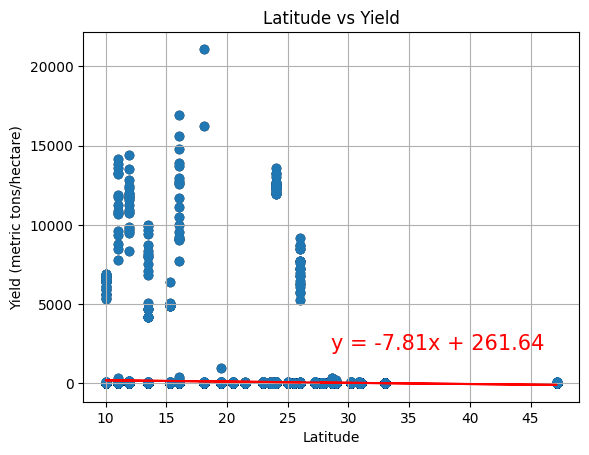

In [43]:
#Plotting scatter plot to show the relationship of Latitude and Yield
plotting_scatter_plot(yield_states["Lat"],yield_states["Yield"],"Latitude","Yield (metric tons/hectare)","Latitude vs Yield")
#Plot linear correlation line
linear_reg_plot(yield_states["Lat"],yield_states["Yield"],anotation_percentage_x=0.5,anotation_percentage_y=0.9)

**Comments:**
- There is a weak relationship between the Latitude and the Yield (r-squared value is: 0.005176457733875771).
- There are some omissions such as: type of crop, year

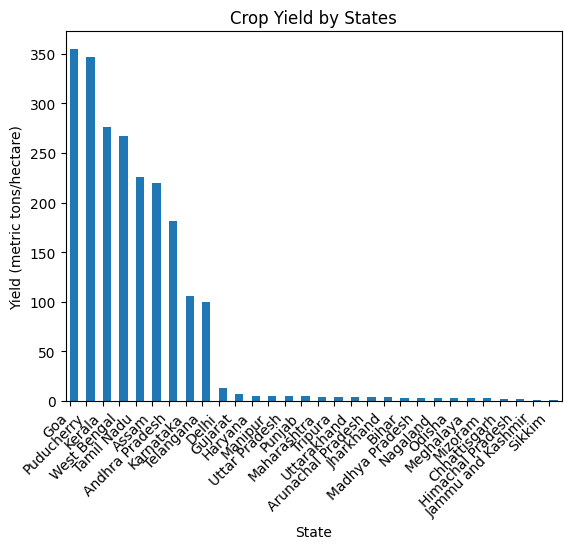

In [116]:
#Plotting bar chart to see the different between states

plot_bar_average_yield_states=average_yield_states.sort_values(by="Yield",ascending=False).plot(kind="bar",
                                                                                                x="State",
                                                                                                align='edge', 
                                                                                                width=0.5,legend=False)
plt.title("Crop Yield by States")
plt.ylabel("Yield (metric tons/hectare)")
plt.xticks(rotation=45, ha='right')
plt.savefig("output/yield_by_state/Crop Yield by States.png")
plt.show()

**Comments:**
- Some states show very high yield, while the others have very low one.
- Some investigations are needed for Goa, Puducherry, Kerala, West Bengal, Tamil Nadu, Assam, Andhra Pradesh, Karnataka, Telangana to find out what make these states have high yield. This could be the crops, the quality of soil...

In [125]:
#Showing Average Yield by state on map
map_yield_stats=merged_average_yield_state.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Yield",
    scale = 1,
    color = "State",
    alpha=0.8)
map_yield_stats.opts(xlabel="Longitude",ylabel="Latitude")
#Save map as png file
hvplot.save(map_yield_stats, 'output/yield_by_state/map_yield_stats.png', fmt='png')
#show map
map_yield_stats


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (State,Yield)

In [126]:
#Hypothesis Testing
stats.ttest_1samp(merged_average_yield_state["Lat"], merged_average_yield_state["Yield"])

ValueError: `popmean.shape[axis]` must equal 1.